In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def test_train_split(x, y, percent=0.75):
    x = x.to_numpy()
    y = y.to_numpy()
    xtrain = np.array([])
    xtest = np.array([])
    ytrain = np.array([])
    ytest = np.array([])
    choice = np.random.uniform(size=(len(x)))
    for i in range(len(x)):
        if choice[i] < percent:
            xtrain = np.append(xtrain,x[i])
            ytrain = np.append(ytrain,y[i])
        else :
            xtest = np.append(xtest,x[i])
            ytest = np.append(ytest,y[i])
    xtrain = xtrain.reshape(-1, len(x[0]))
    xtest = xtest.reshape(-1, len(x[0]))
    return xtest, ytest, xtrain, ytrain

In [28]:
data = pd.read_csv("./housing.csv", delim_whitespace=True, header=None)

In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
x_test, y_test, x_train, y_train = test_train_split(data.loc[:,0:12], data[13])

In [37]:
def SME(y_pred,y_true):
    return np.sum((y_pred-y_true)**2)/len(y_pred)

In [52]:
class LinearRegression:
    def __init__(self,reg=0,penalty=-18):
        self.degree = reg
        self.lmd = math.e**penalty

    def train(self,x, y, learning_rate=0.01, max_iter=1000):
        x = np.c_[np.ones(len(x)),x]
        self.ncols = len(x[0])
        self.param = np.random.randint(0,100,size=(self.ncols))
        sme = np.array([])
        for it in range(max_iter):
            y_pred = self.predict(x)
            reg_term = self.regular_term()
            self.param = self.param - (((y_pred-y) @ x)/len(x) + reg_term)*learning_rate
            sme = np.append(sme, SME(y_pred, y))
        return sme
          
    def regular_term(self):
        if self.degree == 0:    
            return np.zeros((self.ncols))
        elif self.degree == 1:
            return np.full((self.ncols), self.lmd)
        else :
            mag = math.sqrt(np.sum(self.param*self.param))
            return abs(self.param)*self.lmd/mag

    def predict(self,x):
        if len(x[0]) != self.ncols:
            x = np.c_[np.ones(len(x)), x]
        return np.matmul(x, self.param)


In [25]:
def min_max(column):
    mx, mn = max(column), min(column)
    column = (column-mn)/(mx-mn)
    return column

In [31]:
for x in range(13):
    data[x] = min_max(data[x])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


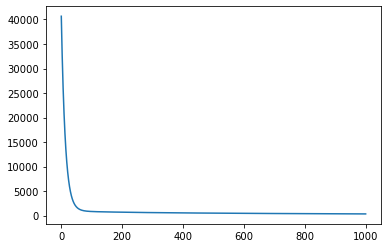

In [53]:
lr = LinearRegression()
sme = lr.train(x_train, y_train)
y_pred = lr.predict(x_test)
plt.plot(range(len(sme)), sme)


In [54]:
print(SME(y_pred, y_test))

316.4528246626752
